import os
import cv2 as cv
from skimage.io import imread,imshow,imsave
import skimage import img_as_ubyte
from skimage.color import rgba2rgb,rgb2gray
from skimage.filters import threshold_otsu,gaussian
from skimage.morphology import binary_closing,closing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rembg import remove

In [66]:
input_folder = "RGB/"
output_folder = "BW/"

In [67]:
def img_resize(image):
    shp = image.shape
    height = shp[0]
    width = shp[1]
    aspect_ratio = float(height) / float(width)
    new_height = int(800 * aspect_ratio)
    resized_image = cv.resize(image,(new_height, 800))
    return resized_image

In [68]:
def image_process(image):
    img = imread(image)
    #img = img_resize(img)
    img = remove(img)
    rgb_img = rgba2rgb(img)
    gray_img = rgb2gray(rgb_img)
    gray_img = gaussian(gray_img)
    bin_img = gray_img < threshold_otsu(gray_img)
    bin_img = closing(bin_img , np.ones((7,7)))
    return bin_img

In [ ]:
leaf_classes = os.listdir(input_folder)
#print(leaf_class)
for classes in leaf_class:
    img_fol_path = input_folder + classes +"/"
    #print(img_path)
    leaf_img = os.listdir(img_fol_path)
    name =1
    for i in leaf_img:
        img_path = img_fol_path + i
        processed_img = image_process(img_path)
        #processed_img = img_as_ubyte(processed_img)
        img_save_path = output_folder +classes +"/"+str(name)+".png"
        imsave(img_save_path , processed_img)
        name = name+1
        #print(img_path)

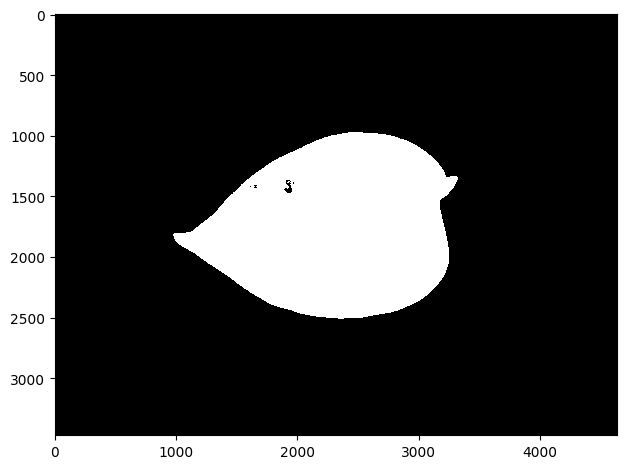

In [73]:
imi = imread("BW/Money Plant/13.png")
imshow(imi)

C:\Python\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


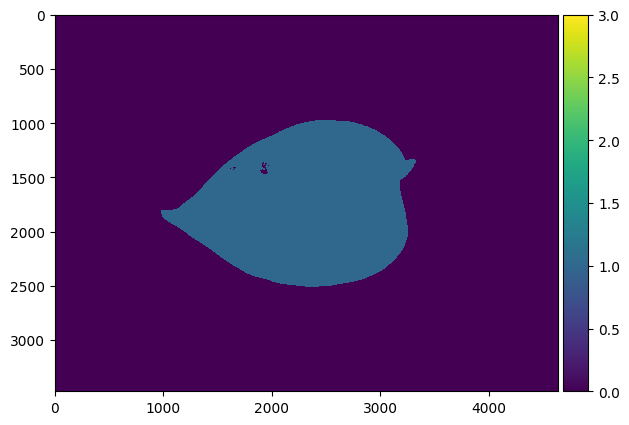

In [74]:
from skimage.measure import label
imshow(label(imi))